<a href="https://colab.research.google.com/github/drishtigoel083/CardiovascularRiskPrediction/blob/main/Cardiovascular_Risk_Prediction_Project_(Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  **Cardiovascular Risk Prediction Project**



Project Type - Classification

Contribution - Individual



## **Project Summary -**

This project aims to predict the risk of cardiovascular disease in individuals based on clinical and lifestyle features using machine learning techniques. Early detection of heart disease risk can help in taking timely preventive measures and improving healthcare outcomes.



## **GitHub Link**





## <b><u> Project Title :  Predicting the risk of cardiovascular disease in individuals </u></b>

## <b> Problem statement </b>

###Given a dataset containing patient data such as age, gender, blood pressure, cholesterol level, smoking habits, and other health indicators, build a predictive model to determine whether a person is at risk of developing cardiovascular disease.




## <b> Data Description </b>

### <b>Attribute Information: </b>

* id:	Unique identifier for each record
* age:	Age of the patient (in years)
* education:	Education level (1 = Primary, 2 = High School, etc.)
* sex	Gender of the patient (Male / Female)
* is_smoking	Whether the patient smokes (YES / NO)
* cigsPerDay	Average number of cigarettes per day
BPMeds	Whether on blood pressure medication (0/1)
prevalentStroke	History of stroke (0 = No, 1 = Yes)
prevalentHyp	History of hypertension (0 = No, 1 = Yes)
diabetes	Diabetes status (0 = No, 1 = Yes)
totChol	Total cholesterol level (mg/dL)
sysBP	Systolic blood pressure
diaBP	Diastolic blood pressure
BMI	Body Mass Index
heartRate	Resting heart rate
glucose	Glucose level
TenYearCHD	Target: 10-year risk of coronary heart disease (0 = No, 1 = Yes)


##**Import the dependancy**

In [2]:
# Import all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics
from datetime import datetime

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve

import lightgbm as lgb
import xgboost as xgb
from xgboost import XGBClassifier

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Copy of data_cardiovascular_risk.csv')

###**Dataset First View**

In [5]:
# Check first five rows of the data
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [6]:
# Checking last five rows of the data
df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


###Dataset information

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

###Checking Null values

In [8]:
# Checking for null data
df.isnull().sum()

,0
id,0
age,0
education,87
sex,0
is_smoking,0
cigsPerDay,22
BPMeds,44
prevalentStroke,0
prevalentHyp,0
diabetes,0


* From the above data we can understand that there are null values present in the data

###Dataset Rows & Columns count

In [9]:
df.shape

(3390, 17)

###Duplicate Values

In [10]:
df.duplicated().sum()

np.int64(0)

## ***Understanding Your Variables***

In [11]:
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [12]:
df.describe(include='all')

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3390,3390,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
unique,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1694.500000,49.542183,1.970936,NaN,NaN,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,NaN,NaN,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,NaN,NaN,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000


###Check Unique Values for each variable.

In [13]:
for i in df.columns.tolist():
  print("No. of unique values in", i ,"is", df[i].nunique())

No. of unique values in id is 3390
No. of unique values in age is 39
No. of unique values in education is 4
No. of unique values in sex is 2
No. of unique values in is_smoking is 2
No. of unique values in cigsPerDay is 32
No. of unique values in BPMeds is 2
No. of unique values in prevalentStroke is 2
No. of unique values in prevalentHyp is 2
No. of unique values in diabetes is 2
No. of unique values in totChol is 240
No. of unique values in sysBP is 226
No. of unique values in diaBP is 142
No. of unique values in BMI is 1259
No. of unique values in heartRate is 68
No. of unique values in glucose is 132
No. of unique values in TenYearCHD is 2


##**Data wrangling**

In [14]:
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [15]:
#droppping id column
df.drop(columns = 'id',inplace = True)

In [16]:
# Summing null values
print('Missing Data Count')
df.isna().sum()[df.isna().sum() > 0].sort_values(ascending=False)

Missing Data Count


,0
glucose,304
education,87
BPMeds,44
totChol,38
cigsPerDay,22
BMI,14
heartRate,1


In [17]:
print('Missing Data Percentage')
print(round(df.isna().sum()[df.isna().sum() > 0].sort_values(ascending=False)/len(df)*100,2))

Missing Data Percentage
glucose       8.97
education     2.57
BPMeds        1.30
totChol       1.12
cigsPerDay    0.65
BMI           0.41
heartRate     0.03
dtype: float64


In [18]:
# Imputing missing values with median or mode
df.fillna({'glucose': df['glucose'].median(),
           'education': df['education'].mode()[0],
           'BPMeds': df['BPMeds'].mode()[0],
           'totChol': df['totChol'].median(),
           'cigsPerDay': df['cigsPerDay'].median(),
           'BMI': df['BMI'].median(),
           'heartRate': df['heartRate'].median()}, inplace=True)

What all manipulations have you done and insights you found?

performed imputation of missing values using a combination of median and mode imputation. Specifically, for the glucose and totChol columns, cigsPerDay, BMI, and heartRate the missing values are replaced with the median of the non-missing values. For the education, BPMeds columns, the missing values are replaced with the mode (most frequently occurring value) of the non-missing values.

Median and mode imputation are commonly used imputation techniques for handling missing values. Median imputation is often used for continuous variables, as it is less sensitive to outliers compared to mean imputation.

Mode imputation is often used for categorical variables or discrete variables with a small number of possible values.

#**Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

###Chart- 1 : Frequency of CHD cases by gender

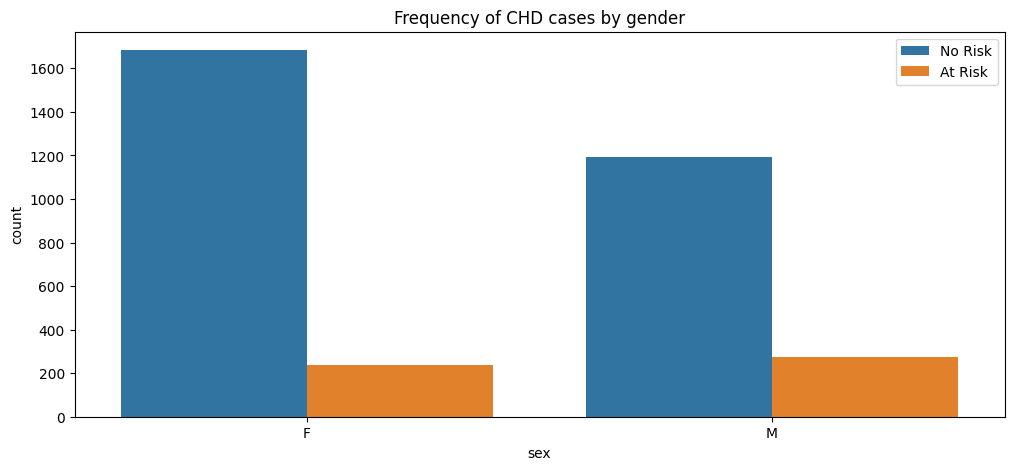

In [19]:
plt.figure(figsize=(12,5))
sns.countplot(x='sex', hue='TenYearCHD', data= df)
plt.title('Frequency of CHD cases by gender')
plt.legend(['No Risk', 'At Risk'])
plt.show()


The chart shows that there are more cases of CHD among men than women in the dataset. However, this difference is not drastic, as the number of cases of CHD is relatively similar between men and women. Additionally, the chart shows that there are more cases of no risk for CHD among women compared to men.

###Chart-2 : Age Distribution of Patients by Sex and CHD Risk Level

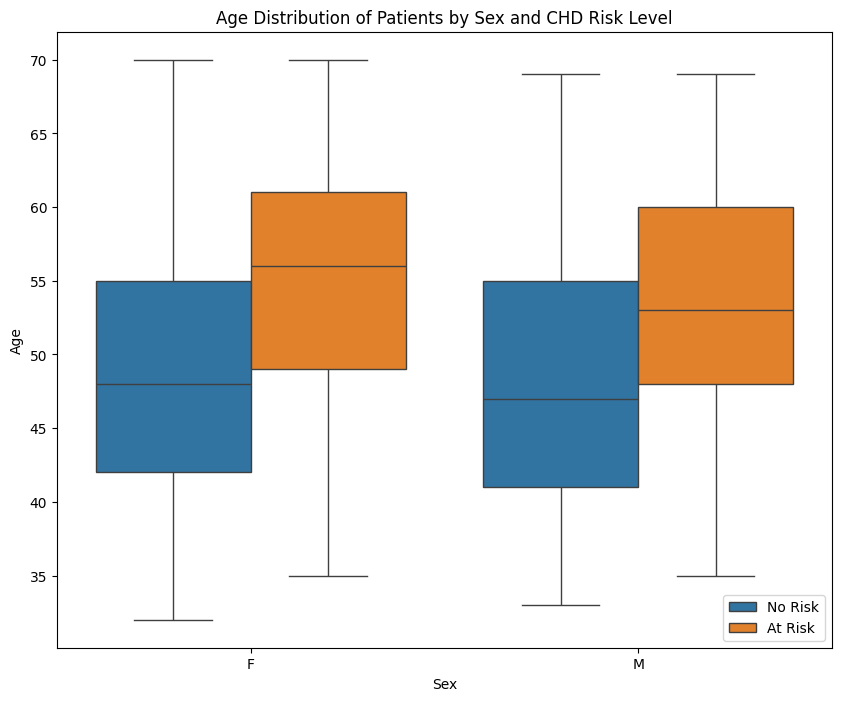

In [20]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(x="sex", y="age", hue="TenYearCHD", data= df, ax=ax)
ax.set_title("Age Distribution of Patients by Sex and CHD Risk Level")
ax.set_xlabel("Sex")
ax.set_ylabel("Age")
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ["No Risk", "At Risk"], loc="best")
plt.show()

There is a noticeable difference in the age distribution of patients who are at risk for CHD compared to those who are not at risk. Patients at risk for CHD tend to be older than those who are not at risk, regardless of sex.

###Chart-3 : Percentage of Smokers and Non-Smokers

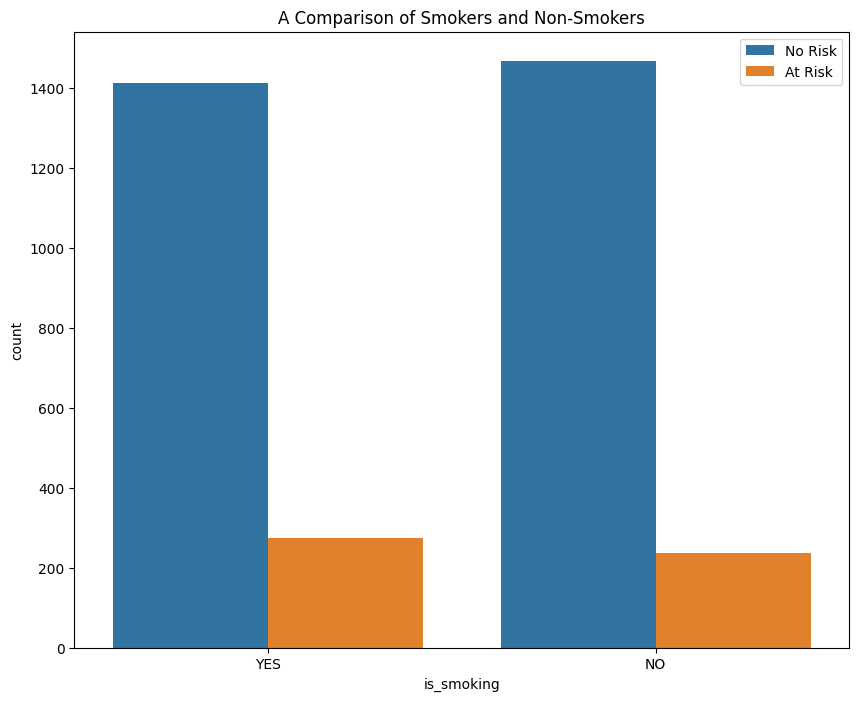

In [21]:
# Chart - 3 visualization code
plt.figure(figsize=(10,8))
sns.countplot(x='is_smoking', hue='TenYearCHD', data= df)
plt.title('A Comparison of Smokers and Non-Smokers')
plt.legend(['No Risk', 'At Risk'])
plt.show()


The chart shows that patients who smoke appear to be at higher risk for CHD than those who do not smoke in this dataset. Specifically, a higher proportion of patients who smoke are at risk for CHD compared to those who do not smoke. These findings suggest that smoking may be a factor in determining the risk of CHD in this dataset.

###Chart-4: Relationship between BP Medication and CHD Risk

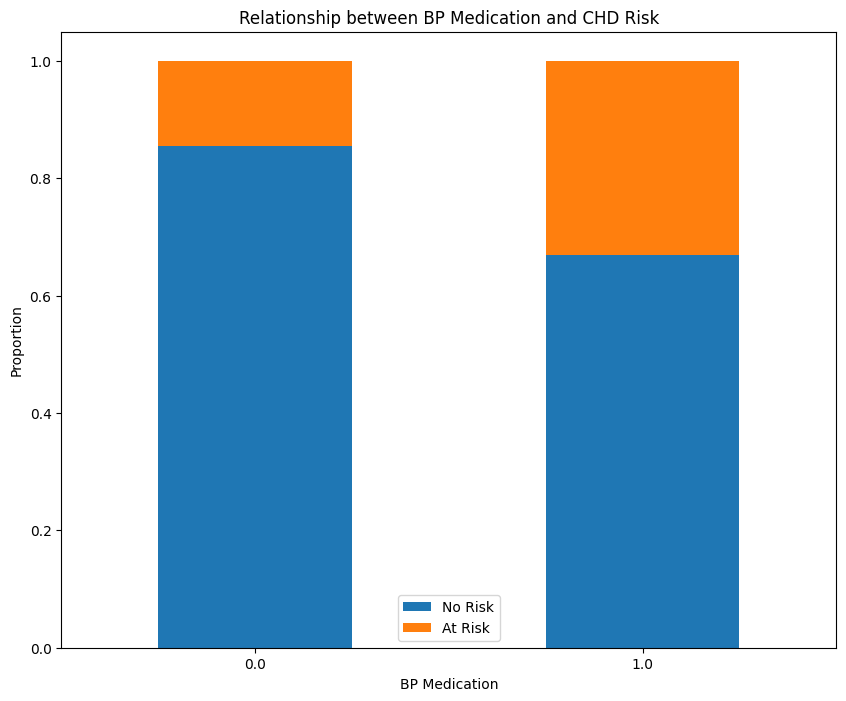

In [22]:
# Chart - 5 visualization code
ct = pd.crosstab(df['BPMeds'], df['TenYearCHD'], normalize='index')
ct.plot(kind='bar', stacked=True, figsize=(10, 8))
plt.title('Relationship between BP Medication and CHD Risk')
plt.xlabel('BP Medication')
plt.xticks(rotation=0)
plt.ylabel('Proportion')
plt.legend(['No Risk', 'At Risk'])
plt.show()

The chart shows that patients who take medication for blood pressure appear to be at higher risk for CHD compared to those who do not take medication for blood pressure. Specifically, the proportion of patients who are at risk for CHD is not similar for those who take medication for blood pressure and those who do not. These findings suggest that BP medication use may be a significant factor in determining CHD risk in this dataset.

###Chart-5 : Proportion of patients with and without diabetes at CHD risk

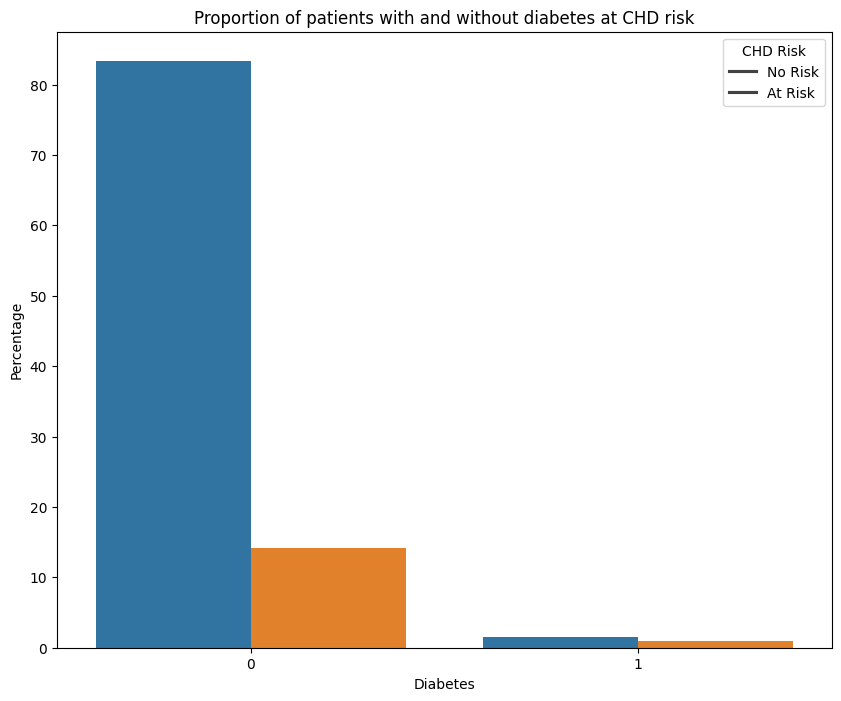

In [23]:
# Chart - 8 visualization code
plt.figure(figsize=(10,8))
sns.barplot(x=df['diabetes'], y=df['TenYearCHD'], hue=df['TenYearCHD'], estimator=lambda x: len(x) / len(df) * 100)
plt.title('Proportion of patients with and without diabetes at CHD risk')
plt.xlabel('Diabetes')
plt.ylabel('Percentage')
plt.legend(title='CHD Risk', labels=['No Risk', 'At Risk'])
plt.show()

The chart shows that patients with diabetes are more likely to be at risk of developing coronary heart disease compared to those without diabetes.

###Chart-6 : Total Cholesterol Levels and CHD

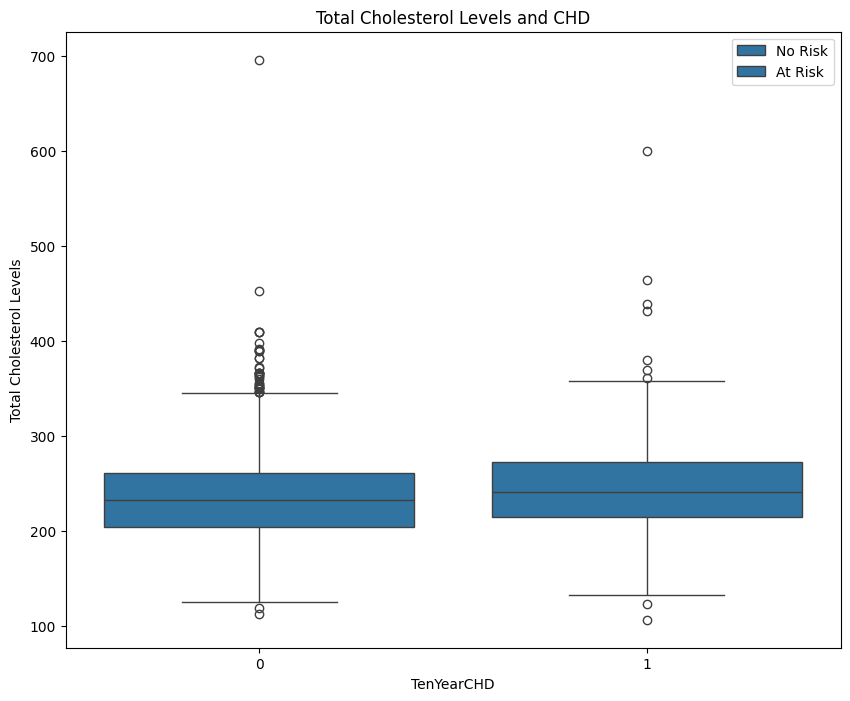

In [24]:
# Chart - 9 visualization code
plt.figure(figsize=(10,8))
sns.boxplot(x='TenYearCHD', y='totChol', data=df)
plt.title('Total Cholesterol Levels and CHD')
plt.xlabel('TenYearCHD')
plt.ylabel('Total Cholesterol Levels')
plt.legend(['No Risk', 'At Risk'])
plt.show()

The box plot shows that patients who are at risk of developing coronary heart disease have slightly higher total cholesterol levels on average than those who are not at risk. There is some overlap in the range of cholesterol levels between the two groups

###Chart-7:  Target Variable Distribution (TenYearCHD)



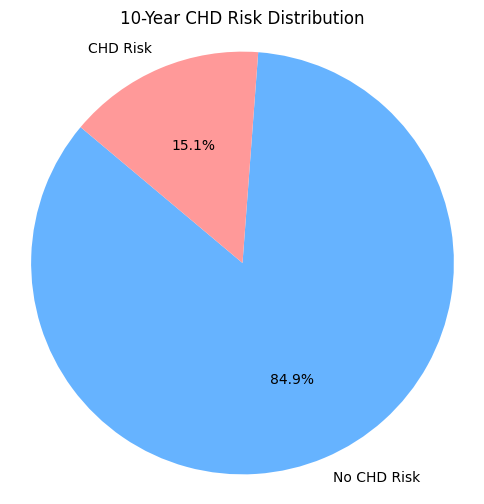

In [25]:
chd_counts = df['TenYearCHD'].value_counts()
labels = ['No CHD Risk', 'CHD Risk']
colors = ['#66b3ff', '#ff9999']

plt.figure(figsize=(6,6))
plt.pie(chd_counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('10-Year CHD Risk Distribution')
plt.axis('equal')
plt.show()

We can see No CHD risk class dominates in the dataset

###Chart-8:BMI Distribution by CHD Risk

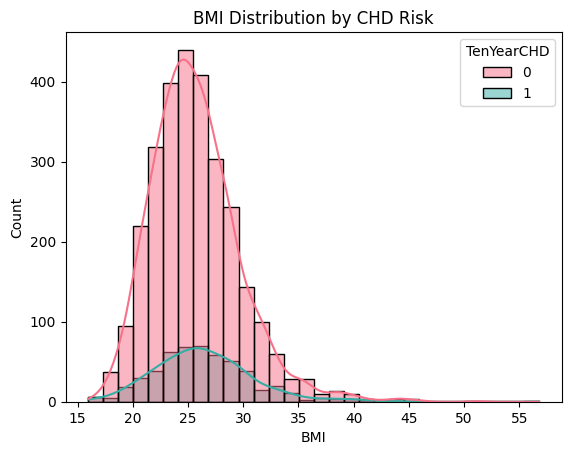

In [26]:
sns.histplot(data=df, x='BMI', hue='TenYearCHD', bins=30, kde=True, palette='husl')
plt.title('BMI Distribution by CHD Risk')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

Higher BMI more frequent in individuals with CHD. Supports obesity as a risk factor.

###Chart-9 Scatter plot matrix

<Figure size 1500x1000 with 0 Axes>

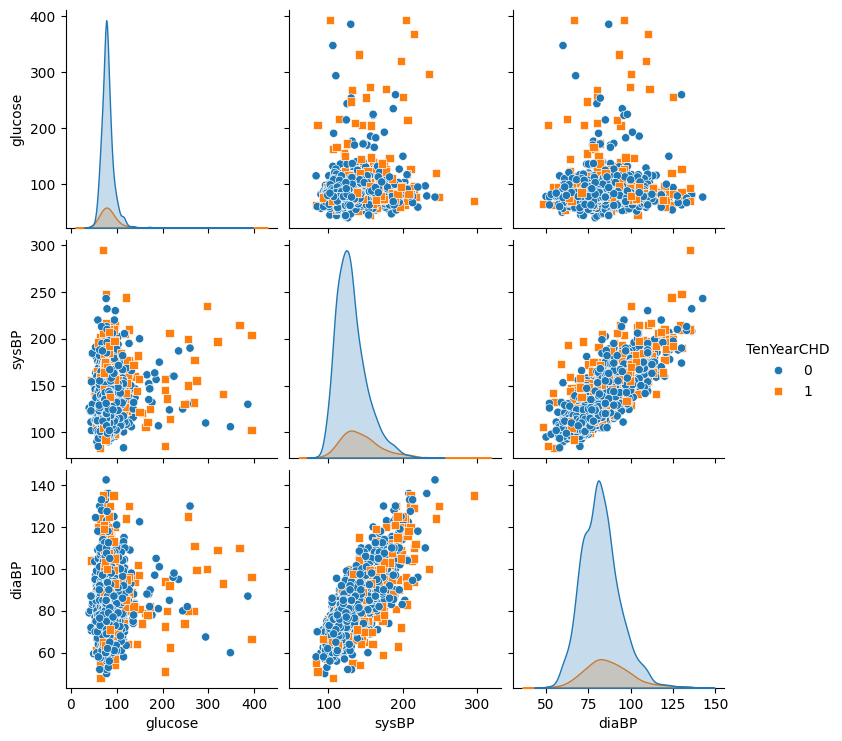

In [27]:
# visualization code
cols = ['glucose', 'sysBP', 'diaBP', 'TenYearCHD']

# create the scatter plot matrix
plt.figure(figsize=(15,10))
sns.pairplot(df[cols], hue='TenYearCHD', markers=['o', 's'])
plt.show()

The pairplot shows the pairwise relationships between glucose levels, systolic blood pressure, diastolic blood pressure, and the risk of developing coronary heart disease. The diagonal histograms show the distribution of each variable, while the scatter plots show the relationship between each pair of variables. For example, we can see that individuals with higher glucose levels tend to have a higher risk of developing coronary heart disease. Similarly, individuals with higher systolic and diastolic blood pressure also have a higher risk of developing coronary heart disease.

### **Correlation Matrix between numerical columns**

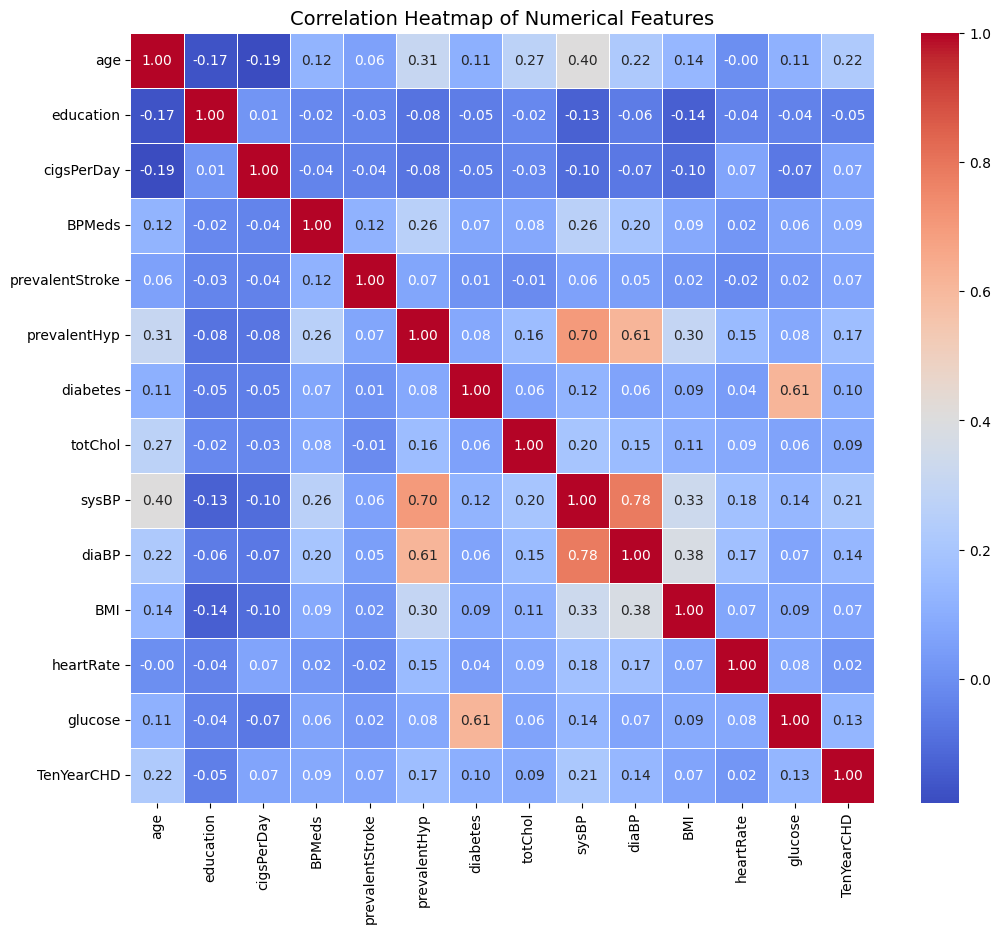

In [28]:
# Select only numerical columns
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
correlation_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features", fontsize=14)
plt.show()


## **Prepare for Modeling**

### **Feature Engineering**

####Checking for the NULL values

In [29]:
df.isnull().sum()

,0
age,0
education,0
sex,0
is_smoking,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,0


####There are no remaining null values in our dataset as we have already processed and handled them in data wrangling.

###**Handling Outliers**

In [30]:
# Separating the categorical and continous variable and storing them
categorical_variable=[]
continous_variable=[]

for i in df.columns:
  if i == 'id':
    pass
  elif df[i].nunique() <5:
    categorical_variable.append(i)
  elif df[i].nunique() >= 5:
    continous_variable.append(i)

print(categorical_variable)
print(continous_variable)

['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']
['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


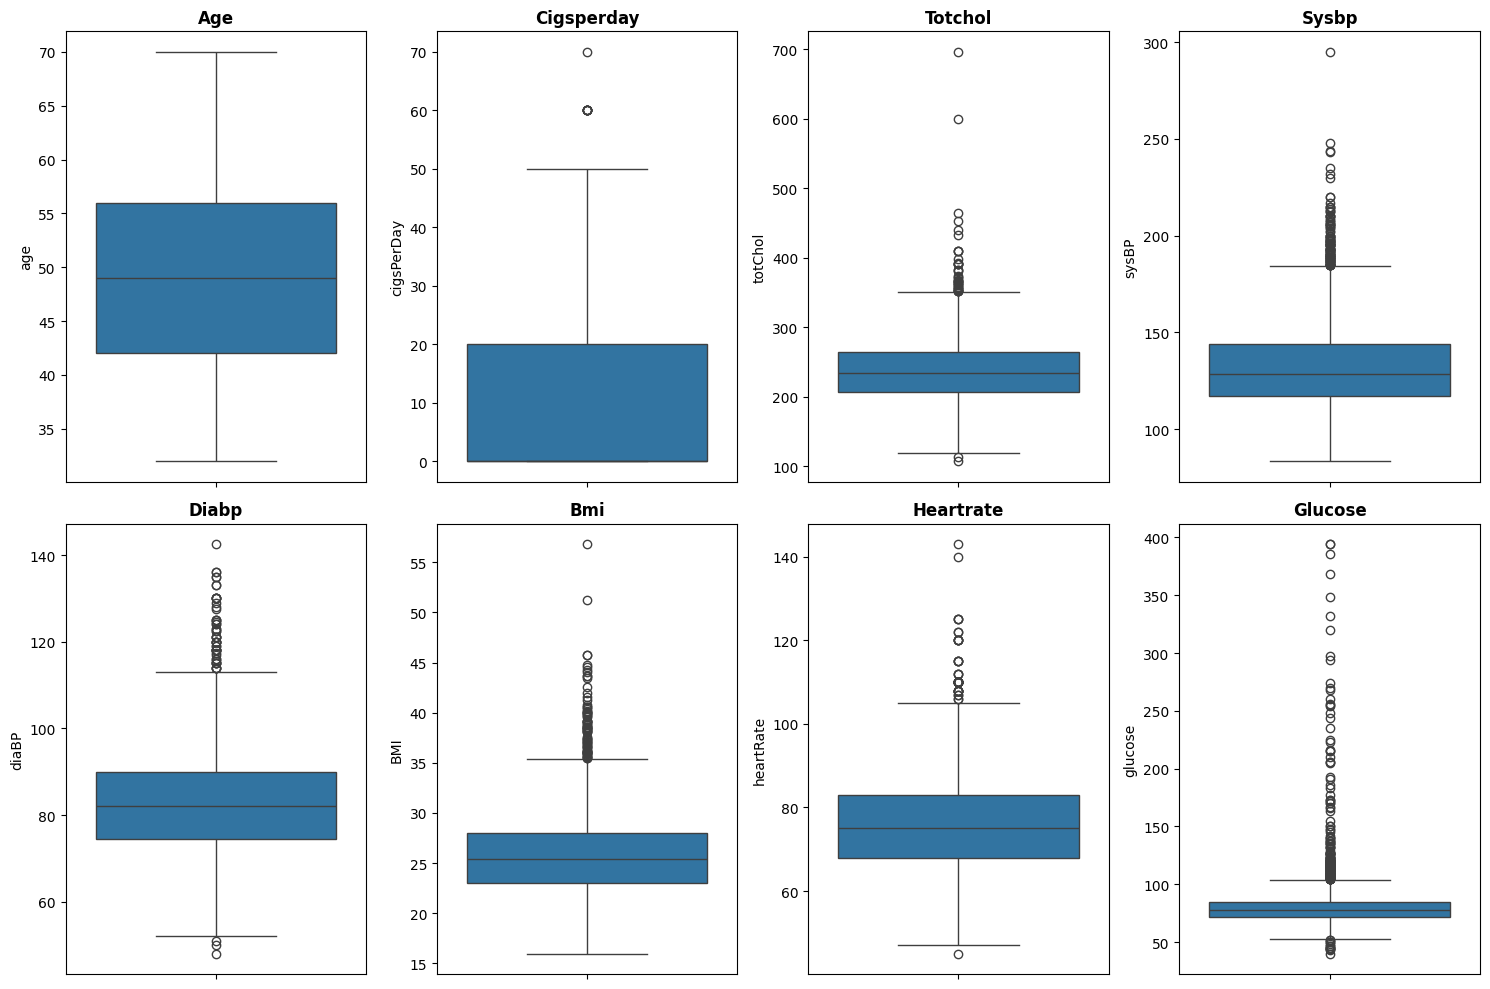

In [31]:
# Handling Outliers & Outlier treatments
fig, axes = plt.subplots(2, 4, figsize=(15, 10))
axes = axes.flatten()
for ax, col in zip(axes, continous_variable):
    sns.boxplot(df[col], ax=ax)
    ax.set_title(col.title(), weight='bold')
plt.tight_layout()

In [32]:
df[continous_variable] = np.log(df[continous_variable] +1 )

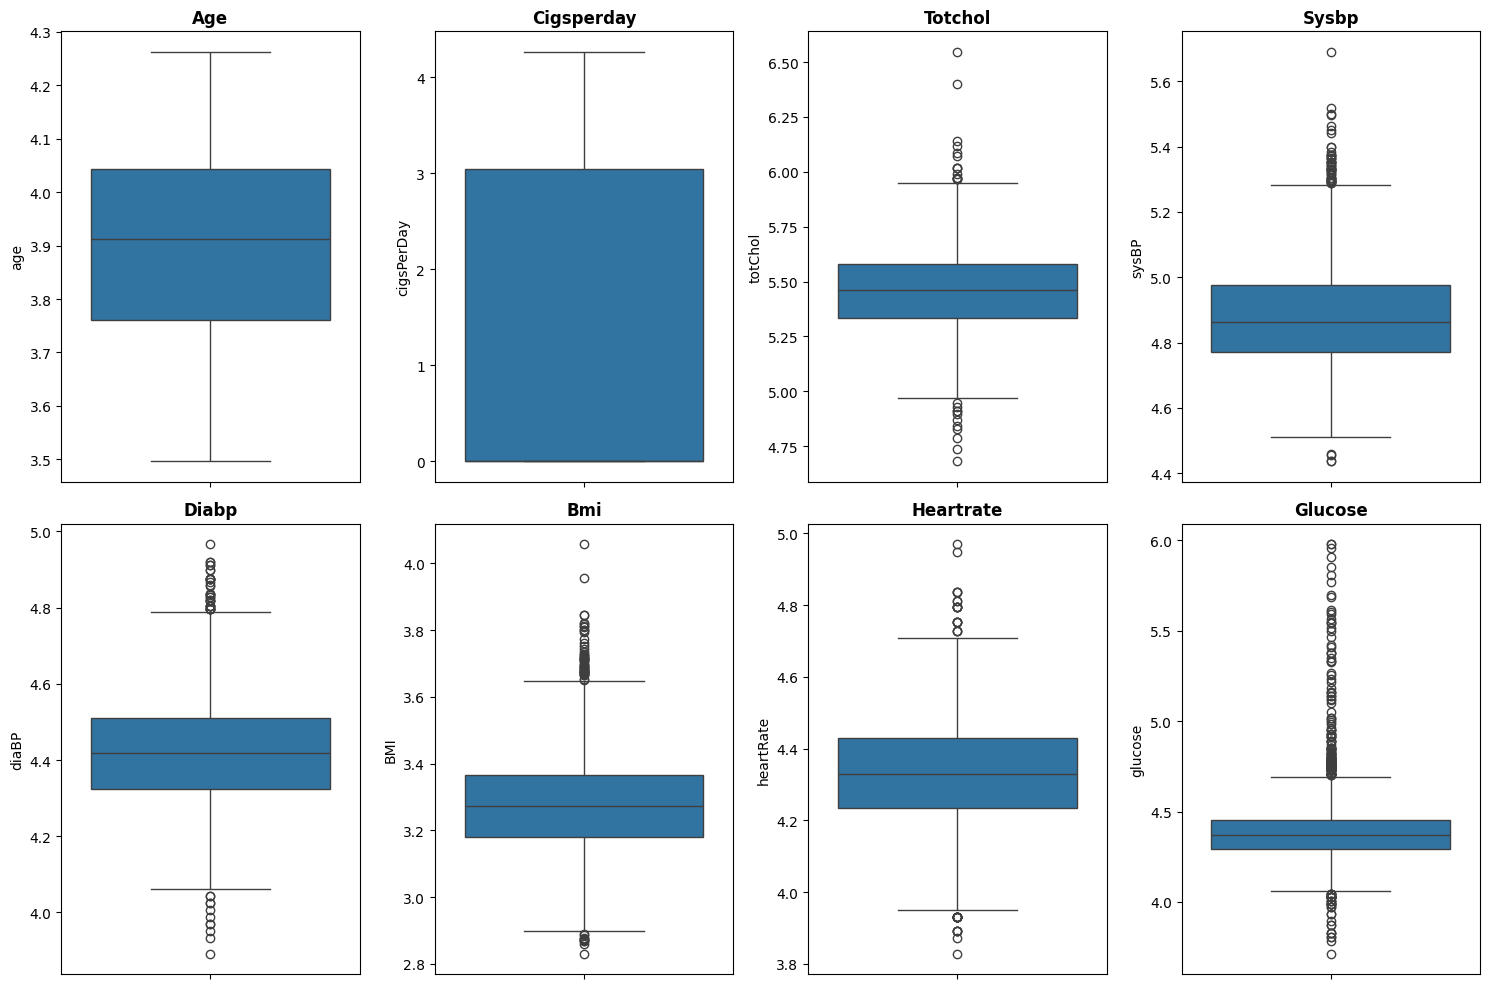

In [33]:
fig, axes = plt.subplots(2, 4, figsize=(15, 10))
axes = axes.flatten()
for ax, col in zip(axes, continous_variable):
    sns.boxplot(df[col], ax=ax)
    ax.set_title(col.title(), weight='bold')
plt.tight_layout()

What all outlier treatment techniques have you used and why did you use those techniques?

* I used LOG TRANSFORMATION method to remove outlier from the dataset.
I used this method because it is a statistical model and easy to implement yet it shows effective results.



### **Categorical Encoding**

In [34]:
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,4.174387,2.0,F,YES,1.386294,0.0,0,0,0,5.402677,5.003946,4.454347,3.272606,4.510860,4.394449,1
1,3.610918,4.0,M,NO,0.000000,0.0,0,1,0,5.361292,5.129899,4.595120,3.426540,4.290459,4.330733,0
2,3.850148,1.0,F,YES,2.397895,0.0,0,0,0,5.525453,4.762174,4.276666,3.061052,4.488636,4.553877,0
3,3.931826,1.0,M,YES,3.044522,0.0,0,1,0,5.455321,5.068904,4.488636,3.376221,4.234107,4.553877,1
4,4.174387,1.0,F,YES,3.433987,0.0,0,0,0,5.488938,4.923624,4.454347,3.311273,4.262680,4.356709,0


In [35]:
df['sex'] = pd.get_dummies(df['sex'],drop_first=True)
df['is_smoking'] = pd.get_dummies(df['is_smoking'],drop_first=True)

In [36]:
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,4.174387,2.0,False,True,1.386294,0.0,0,0,0,5.402677,5.003946,4.454347,3.272606,4.510860,4.394449,1
1,3.610918,4.0,True,False,0.000000,0.0,0,1,0,5.361292,5.129899,4.595120,3.426540,4.290459,4.330733,0
2,3.850148,1.0,False,True,2.397895,0.0,0,0,0,5.525453,4.762174,4.276666,3.061052,4.488636,4.553877,0
3,3.931826,1.0,True,True,3.044522,0.0,0,1,0,5.455321,5.068904,4.488636,3.376221,4.234107,4.553877,1
4,4.174387,1.0,False,True,3.433987,0.0,0,0,0,5.488938,4.923624,4.454347,3.311273,4.262680,4.356709,0


I have used one-hot encoding to transform the categorical variables 'sex' and 'is_smoking' into numerical variables in the form of binary values (0 or 1).

##**Feature Manipulation & Selection**

###Feature Manipulation

Pulse pressure, which is the difference between systolic and diastolic blood pressure, has a notable impact on CHD. Hence, we can create a new feature called PP (pulse pressure) which will combine the systolic and diastolic blood pressure readings into a single column.

In [39]:
df['pulsepressure'] = df['sysBP'] - df['diaBP']

In [40]:
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,pulsepressure
0,4.174387,2.0,False,True,1.386294,0.0,0,0,0,5.402677,5.003946,4.454347,3.272606,4.510860,4.394449,1,0.549599
1,3.610918,4.0,True,False,0.000000,0.0,0,1,0,5.361292,5.129899,4.595120,3.426540,4.290459,4.330733,0,0.534779
2,3.850148,1.0,False,True,2.397895,0.0,0,0,0,5.525453,4.762174,4.276666,3.061052,4.488636,4.553877,0,0.485508
3,3.931826,1.0,True,True,3.044522,0.0,0,1,0,5.455321,5.068904,4.488636,3.376221,4.234107,4.553877,1,0.580268
4,4.174387,1.0,False,True,3.433987,0.0,0,0,0,5.488938,4.923624,4.454347,3.311273,4.262680,4.356709,0,0.469277


### **Feature Selection**

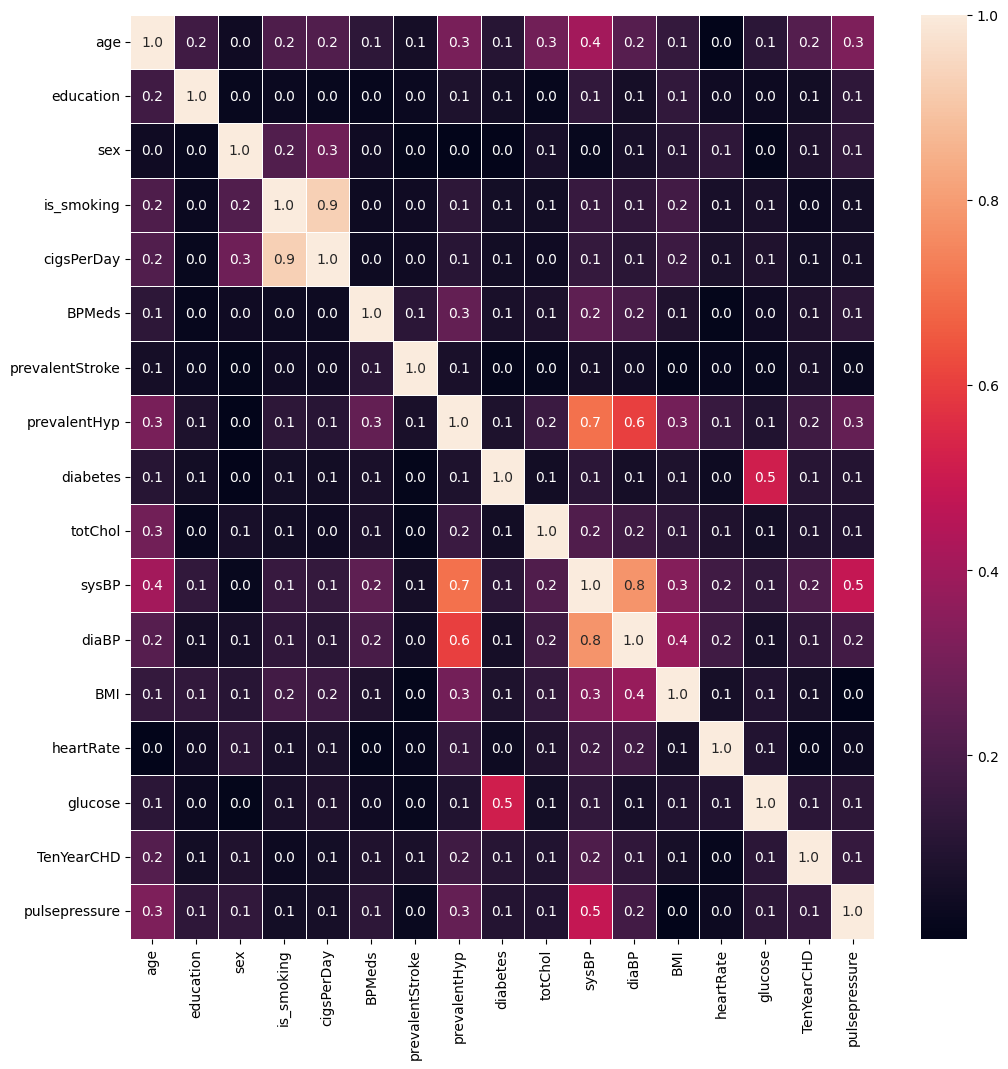

In [41]:
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(abs(round(df.corr(),3)), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()


* Here,we can observe syBP and diaBP are highly correlated and we have calculated pulsepressure from it, so we can drop it now.

* is_smoking and cigsPerDay are also higly related so we can drop one of them which is contributing less in the target variable.



---



###Data Transformation

Data transformation is not required as we did it when treating outliers.

###Data Scaling

In [43]:
df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD', 'pulsepressure'],
      dtype='object')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   float64
 1   education        3390 non-null   float64
 2   sex              3390 non-null   bool   
 3   is_smoking       3390 non-null   bool   
 4   cigsPerDay       3390 non-null   float64
 5   BPMeds           3390 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3390 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3390 non-null   float64
 13  heartRate        3390 non-null   float64
 14  glucose          3390 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
 16  pulsepressure    3390 non-null   float64
dtypes: bool(2), fl

In [47]:
final_df = df[['age', 'education', 'sex','cigsPerDay', 'BPMeds',
               'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol',
               'BMI', 'heartRate', 'glucose', 'pulsepressure', 'TenYearCHD']]

<Axes: >

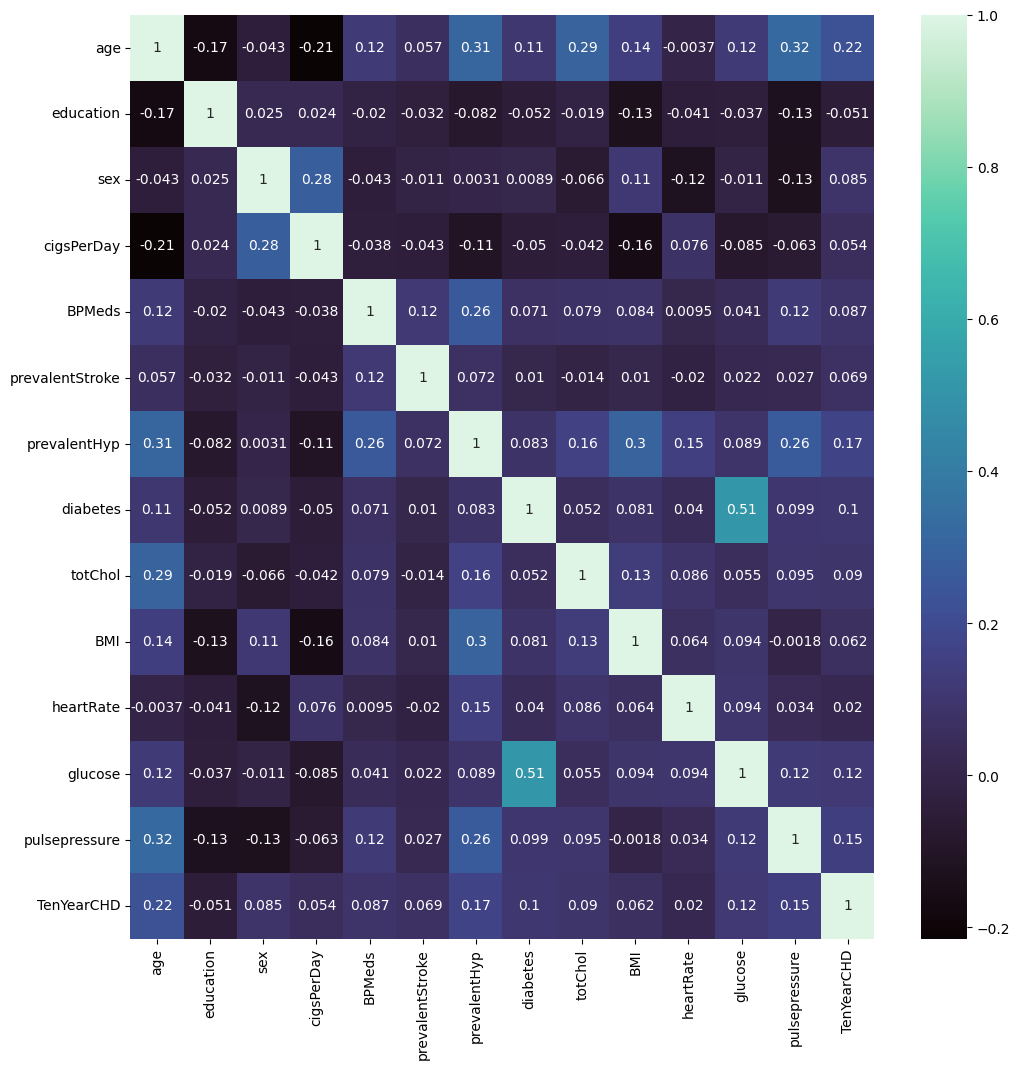

In [48]:

# check for heatmap if anything remains to avoid multicollinearity
plt.figure(figsize=(12,12))
correlation = final_df.corr()
sns.heatmap((correlation), annot=True, cmap=sns.color_palette("mako", as_cmap=True))

In [49]:
# Scaling data
x= final_df.drop('TenYearCHD',axis=1)
y= final_df[['TenYearCHD']]
print(x.shape)
print(y.shape)

(3390, 13)
(3390, 1)


In [51]:
standard_reg = StandardScaler()
x = standard_reg.fit_transform(x)

###Dimesionality Reduction

Cardiovascular risk prediction dataset, it is not necessary to perform dimensionality reduction. This is because the dataset has a relatively small number of features compared to the number of samples, which means that the risk of overfitting is low. Additionally, the dataset is relatively small, so the training time for machine learning models would not be a significant issue.

###Data Splitting

In [52]:
# Splitting data to train and test.
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

### **Handling Imbalanced Dataset**

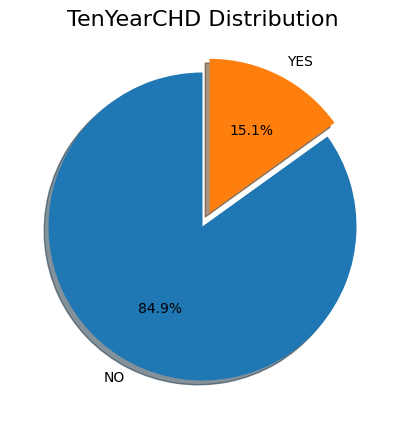

In [56]:
# calculate value counts of 'TenYearCHD' column
counts =df['TenYearCHD'].value_counts()


labels = ['NO','YES']
plt.figure(figsize=(10,5))
plt.pie(counts, labels=labels, autopct= "%1.1f%%",
        startangle=90, shadow=True, explode=[0,.1])
plt.title('TenYearCHD Distribution', fontsize=16)
plt.show()

* From pie chart we can clearly observe that our target variable TenYearCHD is highly imbalanced.
* That means model might bias toward the majority class ("NO") and perform poorly in detecting the minority class ("YES").

* To handle this imbalance, we can consider:Resampling techniques
1. Oversampling the minority class (e.g., using SMOTE)

2. Undersampling the majority class



In [58]:
# Handling Imbalanced Dataset
smote = SMOTE(random_state=10)

x_resampled, y_resampled = smote.fit_resample(x, y)

print('Original dataset shape:', df.shape)
print('Resampled dataset shape:', x_resampled.shape)

print('Class distribution in the resampled dataset:', y_resampled.value_counts())

Original dataset shape: (3390, 17)
Resampled dataset shape: (5758, 13)
Class distribution in the resampled dataset: TenYearCHD
0             2879
1             2879
Name: count, dtype: int64


Splitting the dataset again after oversampling

In [59]:
x_train,x_test,y_train,y_test = train_test_split(x_resampled, y_resampled,test_size=0.2,random_state=10)

In [60]:
# Shape of the train and test data
print('Shape of X_train:{}'.format(x_train.shape))
print('Shape of y_train:{}'.format(y_train.shape))
print('Shape of X_test:{}'.format(x_test.shape))
print('Shape of y_test:{}'.format(y_test.shape))

Shape of X_train:(4606, 13)
Shape of y_train:(4606, 1)
Shape of X_test:(1152, 13)
Shape of y_test:(1152, 1)


**SMOTE:-**


An approach to the construction of classifiers from imbalanced datasets is described. A
dataset is imbalanced if the classification categories are not approximately equally
represented. Often real-world data sets are predominately composed of``normal''examples
with only a small percentage of``abnormal''or``interesting''examples. It is also the case that
the cost of misclassifying an abnormal (interesting) example as a normal example is often
much higher than the cost of the reverse error

* Now data is perfectly balanced.

## **ML Model Implementation**

In [76]:
def model_metrics(y_train, y_test, train_preds, test_preds):
    train_accuracy = accuracy_score(y_train, train_preds)
    test_accuracy = accuracy_score(y_test, test_preds)
    train_precision = precision_score(y_train, train_preds)
    test_precision = precision_score(y_test, test_preds)
    train_recall = recall_score(y_train, train_preds)
    test_recall = recall_score(y_test, test_preds)
    train_roc_auc = roc_auc_score(y_train, train_preds)
    test_roc_auc = roc_auc_score(y_test, test_preds)

    print(f"{'Train Accuracy':<20}{train_accuracy:.4f}")
    print(f"{'Test Accuracy':<20}{test_accuracy:.4f}")
    print(f"{'Train Precision':<20}{train_precision:.4f}")
    print(f"{'Test Precision':<20}{test_precision:.4f}")
    print(f"{'Train Recall':<20}{train_recall:.4f}")
    print(f"{'Test Recall':<20}{test_recall:.4f}")
    print(f"{'Train ROC AUC':<20}{train_roc_auc:.4f}")
    print(f"{'Test ROC AUC':<20}{test_roc_auc:.4f}")
    print("-"*50)

    train_confusion_matrix = confusion_matrix(y_train, train_preds)
    test_confusion_matrix = confusion_matrix(y_test, test_preds)

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    labels = ['0', '1']
    sns.heatmap(train_confusion_matrix, annot=True, cmap='Blues', ax=axes[0], fmt="d", xticklabels=labels, yticklabels=labels)
    axes[0].set_xlabel('Predicted labels')
    axes[0].set_ylabel('True labels')
    axes[0].set_title('Train Confusion Matrix')
    sns.heatmap(test_confusion_matrix, annot=True, cmap='Blues', ax=axes[1], fmt="d", xticklabels=labels, yticklabels=labels)
    axes[1].set_xlabel('Predicted labels')
    axes[1].set_ylabel('True labels')
    axes[1].set_title('Test Confusion Matrix')

    plt.show()


### **1. Logistic Regression**

In [77]:
# ML Model - 1 Implementation
logistic_classifier= LogisticRegression()
# Fit the Algorithm
logistic_classifier.fit(x_train,y_train)
# Predict on the model
y_train_logistic_pred= logistic_classifier.predict(x_train)
y_test_logistic_pred= logistic_classifier.predict(x_test)

Train Accuracy      0.6741
Test Accuracy       0.6597
Train Precision     0.6709
Test Precision      0.6304
Train Recall        0.6977
Test Recall         0.6945
Train ROC AUC       0.6739
Test ROC AUC        0.6612
--------------------------------------------------


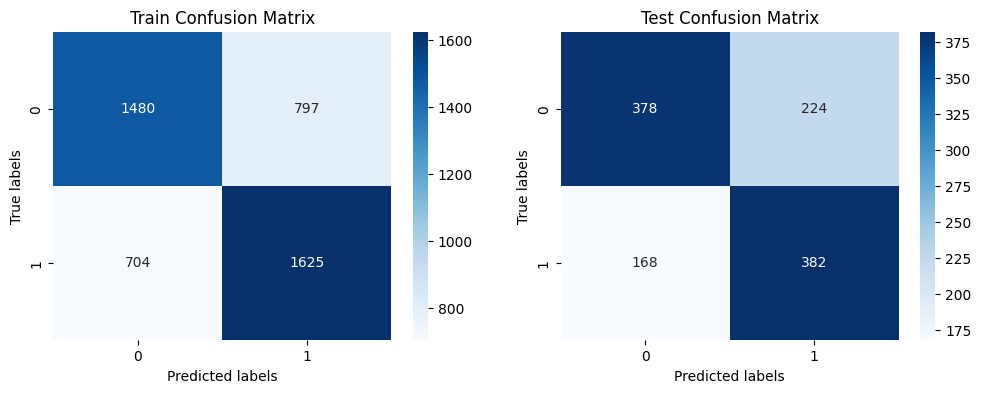

In [78]:
model_metrics(y_train, y_test, y_train_logistic_pred, y_test_logistic_pred)

### **2. Random Forest**

In [79]:
# ML Model - 2  Implementation
random_forest = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=1)

# Fit the Algorithm
random_forest.fit(x_train, y_train)

# Predict on the model
y_train_rf_pred = random_forest.predict(x_train)
y_test_rf_pred = random_forest.predict(x_test)

Train Accuracy      0.9275
Test Accuracy       0.8403
Train Precision     0.8992
Test Precision      0.7859
Train Recall        0.9648
Test Recall         0.9145
Train ROC AUC       0.9271
Test ROC AUC        0.8435
--------------------------------------------------


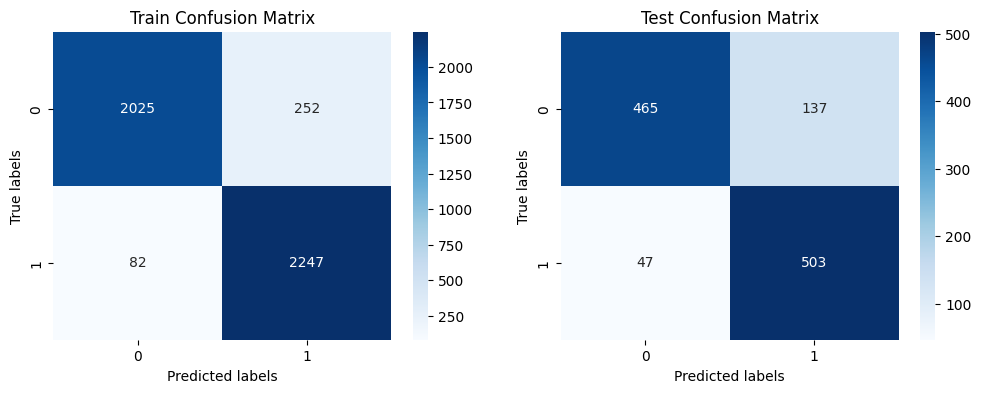

In [80]:
# Visualizing evaluation Metric Score chart
model_metrics(y_train, y_test, y_train_rf_pred, y_test_rf_pred)

Hypermetric tuning

In [94]:

# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
random_forest = RandomForestClassifier()
param_grid = {'n_estimators': [100, 200, 300],
              'max_depth': [5, 10, 15, None],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}
# Fit the Algorithm
grid_search = GridSearchCV(random_forest, param_grid, cv=3)
grid_search.fit(x_train, y_train)
# get the best hyperparameters and print them
best_params = grid_search.best_params_
print('Best hyperparameters:', best_params)
# use the best hyperparameters to fit the model to the training data
random_forest_best = RandomForestClassifier(**best_params)
random_forest_best.fit(x_train, y_train)
# Predict on the model
y_train_rf_pred_gs = random_forest_best.predict(x_train)
y_test_rf_pred_gs  = random_forest_best.predict(x_test)
y_score_rf_pred_gs = random_forest_best.predict_proba(x_test)[:, 1]

Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


Train Accuracy      1.0000
Test Accuracy       0.9028
Train Precision     1.0000
Test Precision      0.8750
Train Recall        1.0000
Test Recall         0.9291
Train ROC AUC       1.0000
Test ROC AUC        0.9039
--------------------------------------------------


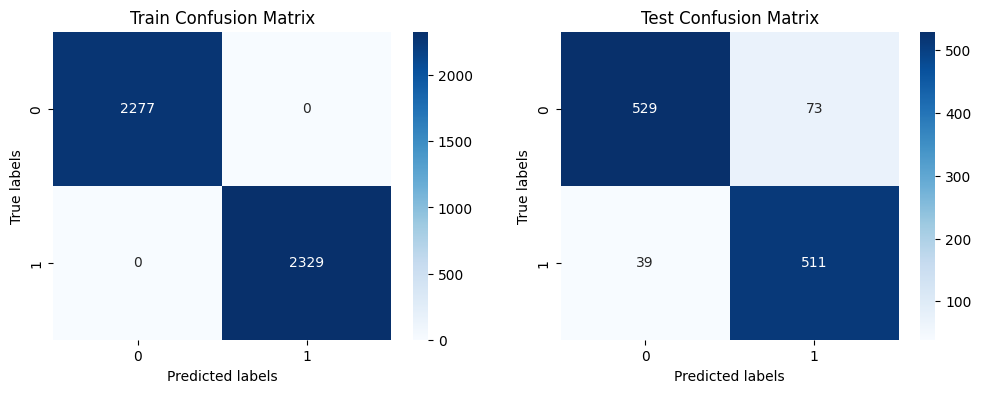

In [95]:
# Visualizing evaluation Metric Score chart
model_metrics(y_train, y_test, y_train_rf_pred_gs, y_test_rf_pred_gs)

### **Model - 3 :  XGBoost Classifier**

In [82]:
# ML Model - 3 Implementation
xgb = XGBClassifier()
# Fit the Algorithm
xgb.fit(x_train, y_train)
# Predict on the model
y_train_xgb_pred = xgb.predict(x_train)
y_test_xgb_pred = xgb.predict(x_test)

Train Accuracy      0.9933
Test Accuracy       0.8906
Train Precision     0.9996
Test Precision      0.8869
Train Recall        0.9871
Test Recall         0.8836
Train ROC AUC       0.9933
Test ROC AUC        0.8903
--------------------------------------------------


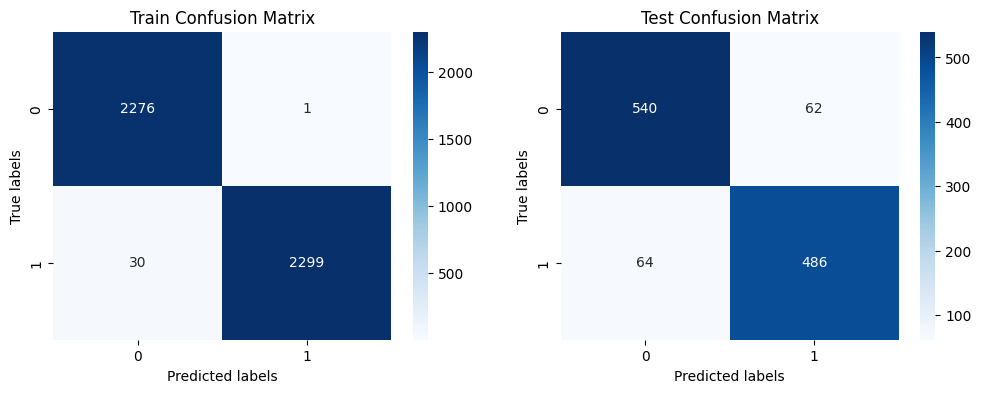

In [83]:
# Visualizing evaluation Metric Score chart
model_metrics(y_train, y_test, y_train_xgb_pred, y_test_xgb_pred)

Cross- Validation & Hyperparameter Tuning

In [84]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# set up the parameter grid for hyperparameter tuning
param_grid = {'max_depth': [3, 5, 7],
              'learning_rate': [0.01, 0.1, 0.3],
              'n_estimators': [50, 100, 200]}
# Fit the Algorithm
grid_search = GridSearchCV(xgb, param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)
# print the best hyperparameters
print('Best hyperparameters:', grid_search.best_params_)
# Predict on the model
best_estimator = grid_search.best_estimator_
y_train_xgb_pred_gs = best_estimator.predict(x_train)
y_test_xgb_pred_gs  = best_estimator.predict(x_test)
y_score_xgb_pred_gs = best_estimator.predict_proba(x_test)[:, 1]

Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}


Train Accuracy      0.9917
Test Accuracy       0.9002
Train Precision     0.9991
Test Precision      0.8976
Train Recall        0.9845
Test Recall         0.8927
Train ROC AUC       0.9918
Test ROC AUC        0.8999
--------------------------------------------------


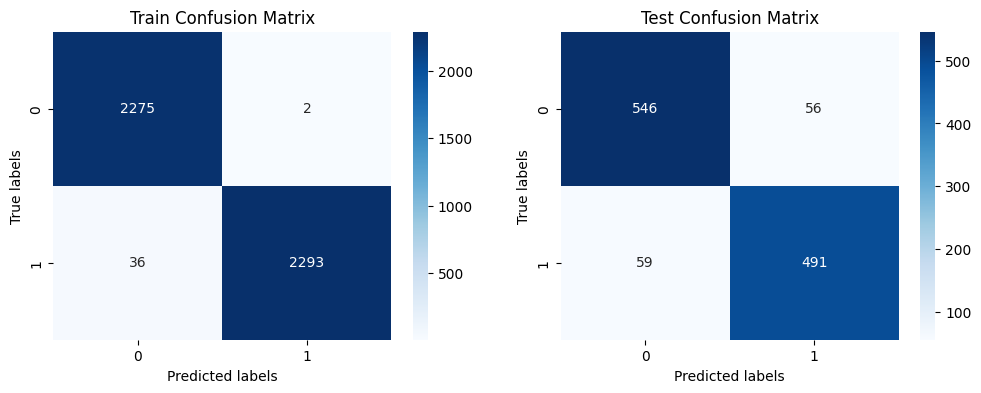

In [85]:
# Visualizing evaluation Metric Score chart
model_metrics(y_train, y_test, y_train_xgb_pred_gs, y_test_xgb_pred_gs)

### **Model-4 : Naive Bayes Classifier**

In [88]:
# ML Model - 4 Implementation
# create an instance of the Gaussian Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

# Fit the Algorithm
nb.fit(x_train, y_train)

# Predict on the model
y_train_nb_pred = nb.predict(x_train)
y_test_nb_pred = nb.predict(x_test)

Train Accuracy      0.5667
Test Accuracy       0.5747
Train Precision     0.7459
Test Precision      0.7083
Train Recall        0.2168
Test Recall         0.1855
Train ROC AUC       0.5706
Test ROC AUC        0.5578
--------------------------------------------------


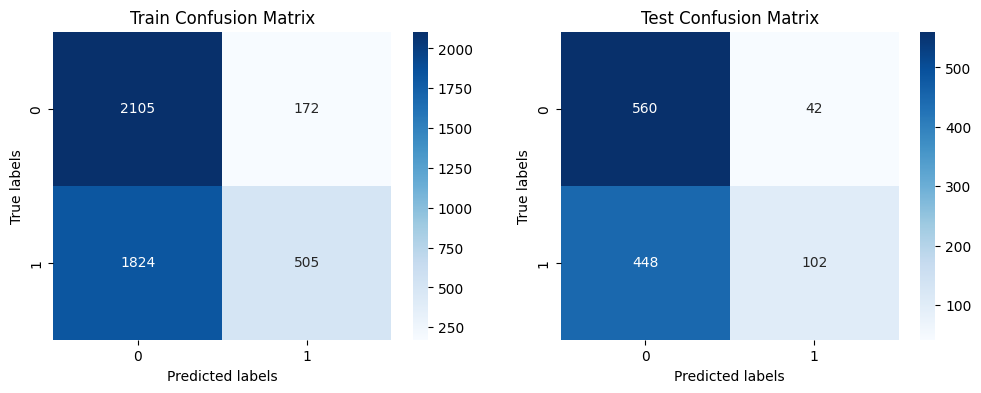

In [89]:
# Visualizing evaluation Metric Score chart
model_metrics(y_train, y_test, y_train_nb_pred, y_test_nb_pred)

## **EVALUATION MATRIX**

Here Predicting TenYearCHD considered as classification problem, where the goal is to predict a outcome variable (TenYearChd) based on one or more predictor variables.

Accuracy: Accuracy is a commonly used metric to evaluate the performance of a classification model. It measures the percentage of correctly classified instances among all instances. A higher accuracy score indicates a better performance of the model in predicting the correct class for each instance.

Precision: Precision is a metric that measures the proportion of true positive predictions among all positive predictions made by the model. It is calculated by dividing the number of true positives by the sum of true positives and false positives. A higher precision score indicates that the model has a lower rate of false positives, which is important in applications where false positives have a high cost.

Recall: Recall, also known as sensitivity or true positive rate, is a metric that measures the proportion of true positive predictions among all instances that actually belong to the positive class. It is calculated by dividing the number of true positives by the sum of true positives and false negatives. A higher recall score indicates that the model has a lower rate of false negatives, which is important in applications where false negatives have a high cost.

AUC ROC: The Area Under the Receiver Operating Characteristic Curve (AUC ROC) is a metric used to evaluate the performance of binary classification models. It measures the model's ability to distinguish between positive and negative classes at different probability thresholds. The AUC ROC score ranges between 0 and 1, with a score of 0.5 indicating a random model and a score of 1 indicating a perfect model. A higher AUC ROC score indicates a better performance of the model in distinguishing between positive and negative classes.

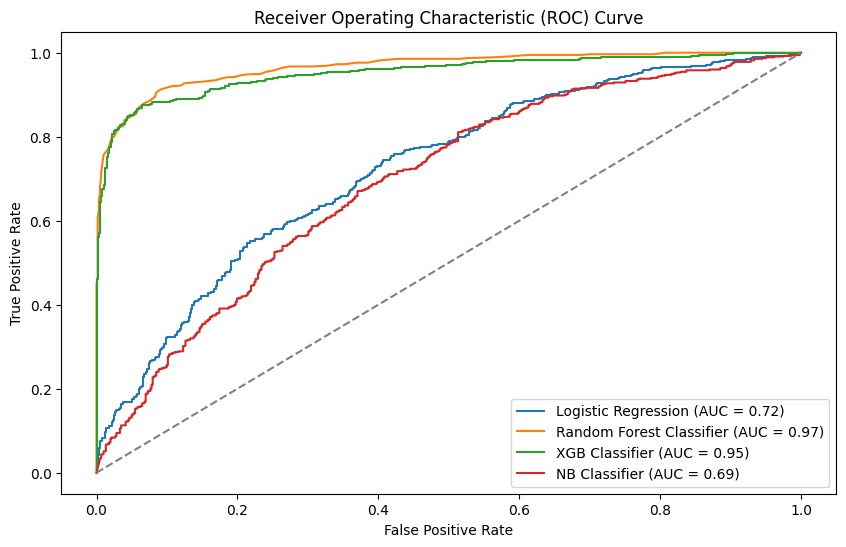

In [92]:
# define the classifiers
classifiers = [ ("Logistic Regression", LogisticRegression()),
                ("Random Forest Classifier", RandomForestClassifier()),
                ("XGB Classifier", XGBClassifier()),
                ("NB Classifier", GaussianNB())]

# iterate through classifiers and plot ROC curves
plt.figure(figsize=(10, 6))
for name, classifier in classifiers:
    classifier.fit(x_train, y_train)
    y_score = classifier.predict_proba(x_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

* The ROC Plot (Receiver Operating Characteristic Curve) is a graphical representation used to evaluate the performance of a binary classification model.

* **Purpose of the ROC Curve**:
To see how well the model distinguishes between the two classes (positive vs negative).

* A curve closer to the top-left corner (high TPR, low FPR) means better performance.

* **Interpretation**

   Random Forest has the best performance (AUC = 0.97).
   XGBoost also performs very well (AUC = 0.95).


In [96]:
# Storing metrics in order to make dataframe of metrics
# (after cross validation and hyperparameter tuning)
Model          = ["Logistic Regression", "Random Forest Classifier", "XGBoost", "NBClassifier"]
Test_Accuracy  = [0.6597,0.9028,0.9002,0.5747]
Test_Precision = [0.6304,0.8750,0.8976,0.7083]
Test_Recall    = [0.6945,0.9291,0.9845,0.1855]
Test_ROC_AUC   = [0.6612,0.9039,0.8999,0.5578]
# Create dataframe from the lists
data = {'Model' : Model,
        'Test_Accuracy'  : Test_Accuracy,
        'Test_Precision' : Test_Precision,
        'Test_Recall'    : Test_Recall,
        'Test_ROC_AUC'   : Test_ROC_AUC}
Metric_df = pd.DataFrame(data)

# Printing dataframe
Metric_df

,Model,Test_Accuracy,Test_Precision,Test_Recall,Test_ROC_AUC
0,Logistic Regression,0.6597,0.6304,0.6945,0.6612
1,Random Forest Classifier,0.9028,0.8750,0.9291,0.9039
2,XGBoost,0.9002,0.8976,0.9845,0.8999
3,NBClassifier,0.5747,0.7083,0.1855,0.5578


* Among all the evaluated models, the** Random Forest Classifier** demonstrated the best overall performance. It achieved the highest accuracy of 90.28%, with a balanced trade-off between precision (87.5%) and recall (92.91%), indicating that it is both precise in its predictions and effective at identifying positive cases. Its ROC AUC score of 0.9039 further supports its strong classification ability across various thresholds. Hence, it is the most suitable model for this classification task.

* The XGBoost Classifier also performed well, with an accuracy of 90.02% and notably high recall (98.45%), which means it is excellent at identifying actual positive cases. It also had the highest precision (89.76%) among all models. Although its ROC AUC score was slightly lower than Random Forest at 0.8999, it remains a strong contender and could be preferred in situations where recall is more critical than precision.

* In contrast, the Logistic Regression model showed moderate performance with an accuracy of 65.97%, and lower precision and recall compared to the ensemble models. While it is not the best in terms of accuracy, it may still be considered when model interpretability is a top priority.

* The Naive Bayes Classifier underperformed significantly, with the lowest accuracy of 57.47% and very poor recall (18.55%). Its ROC AUC score of 0.5578 suggests that its ability to distinguish between classes is only slightly better than random guessing. Therefore, it is not recommended for this use case.



***So, I am choosing Random Forest Classifier model as best fit classification model for Cardiovascular Risk Prediction dataset.***

## **MODEL EXPLAINABILITY**

**Apply sharply for FEATURES IMPORTANCE**

Text(0.5, 0, 'Relative Importance')

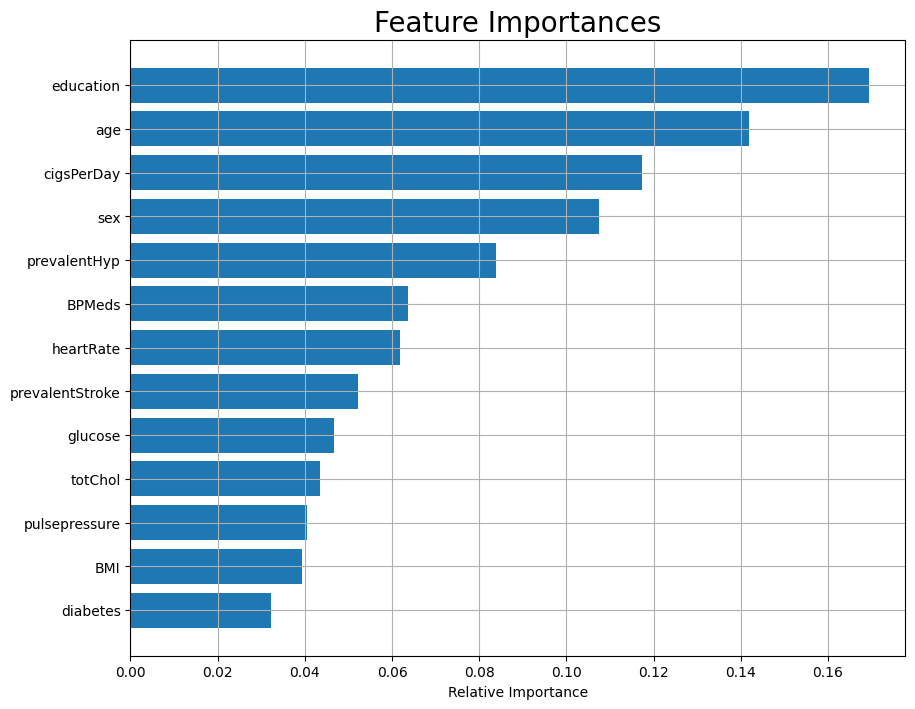

In [98]:
# Plotting the barplot to determine which feature is contributing the most
features = final_df.columns
importances = best_estimator.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(10,8))
plt.grid(zorder=0)
plt.title('Feature Importances', fontsize=20)
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

# **Conclusion:-**

## **Conclusion from EDA**

* vAge is a significant factor in determining CHD risk.

* Men are more likely to develop CHD than women.

* Smoking is a risk factor for CHD, and smoking intensity plays a role in determining the risk.

* Patients with high blood pressure, stroke, and diabetes are at higher risk for CHD.

* Patients who have had a prevalent stroke and prevalent hypertension are more likely to be at risk for CHD.

* Patients with diabetes are also more likely to be at risk for CHD.

* Total cholesterol levels are slightly higher in patients at risk for CHD.

* There is a positive relationship between certain variables such as age and systolic blood pressure, BMI and glucose levels.

## **Conclusion From Model Implementation**

* Among the four models tested, the Random Forest Classifier and XGBoost models performed the best, with high accuracy, precision, and recall scores.

* The  Naive Bayes Classifier model had a lower accuracy and ROC AUC score, indicating that it may not be as suitable for this particular classification problem.









